In [1]:
!pip install graphviz


Creating the following States: q0, q1, q2, q3
Creating Transitions for States:
Source: q0, Destination: q1, Trigger: a 
Source: q0, Destination: q2, Trigger: b 
Source: q1, Destination: q2, Trigger: b 
Source: q2, Destination: q3, Trigger: c 

The finite state machine will evaluate the following string: "abc"

Transitioning from state q0 to state q1
Transitioning from state q1 to state q2
Transitioning from state q2 to state q3
The FSM has evaluated the string and is in an accepting state
The String "abc" is accepted by Finite State Machine "AlphabetSoup"


Widget Javascript not detected.  It may not be installed or enabled properly.


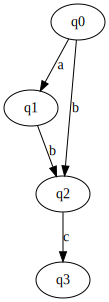

In [2]:
from graphviz import Digraph
import functools
from ipywidgets import * 
from IPython.display import display
from IPython.display import clear_output


class FiniteStateMachine(object):
    def __init__(self, name, states=None, initial='S', final='', transitions=None):

        #Arguments
        """
        name:
        The name of the finite state machine object
        type(name) = String
        
        states:
        A list of all states in the finite state machine object,
        type(states) = [State]

        initial:
        The start state of the finite state machine,
        type(initial) = State

        final:
        The final/accepting state of the finite state machine,
        type(final) = State
                 
        transitions:
        A list of all transitions that are found in the FSM,
        type(transitions) = [Transition]
        """

        #A global variable to store the current state of the FSM
        global currentState;
        currentState = "";

        self.name = name;
        self.states = states;
        self.initial = initial;
        self.final = final;
        self.transitions = transitions;
        currentState = initial;
    
class State(object):
    def __init__(self, name):
        self.name = name;
    """
        State Objects are simply placeholder objects that holds a
        state's name.
    """

    def getName(self):
        return self.name;
    
class Transition(object):    
    def __init__(self, source, dest, trigger):

        """
        source:        
        The source state where this transition occurs,
        type(source) = String, usually one character, ex: "a"
        
        dest:
        The destination state to enter after completing the transition
        type(dest) = String
        
        #trigger:
        The valid input string required for the transition to execute
        type(trigger) = String         
        """
        
        self.source = source;
        self.dest = dest;
        self.trigger = trigger;

    def getSource(self):
        return self.source;

    def getDest(self):
        return self.dest;

    def getTrigger(self):
        return self.trigger;

    #Transition event occurred
    def transition(self, inp):
        #Checks if the transition is valid for the current state
        if(currentState == self.source):
            #Checks if the input character matches the required transition symbol
            if(inp == self.trigger):
                print("Transitioning from state %s to state %s"
                  % (self.source, self.dest));
                #Set new current state to be the destination state
                newCurrentState(self.dest);
            else:
                print("Invalid transition")

    def printTransition(self):
        print("Source: %s, Destination: %s, Trigger: %s " % (self.source, self.dest, self.trigger));
        

#Updates the current state of the finite state machine
def newCurrentState(s):
    global currentState
    currentState = s;

#Evaluates an input string 's' given a FSM 'f'
#TODO: Implement backtracking or DFS/BFS-like transition evaluation
#      for specific cases of input strings where the current method
#      will incorrectly evaluate a string as False
def evaluateString(f,s):
    finalState = f.final;
    startState = f.initial;
    trans = f.transitions;

    #Resets the CurrentState var to the start state so evaluations of
    #input strings are independent of the results of the previous input string
    newCurrentState(startState)

    #Iterate over each character in String 's'
    for i in range(0,len(s)):
        #Iterate over each transition in FSM
        for j in range (0, len(trans)):
            #Checks if transition applies to the current state of the FSM
            if(currentState == trans[j].getSource()):
                #Checks if the input string matches the required transition symbol
                if(s[i] == trans[j].getTrigger()):
                    trans[j].transition(s[i]);

    if(currentState == finalState):
        print('The FSM has evaluated the string and is in an accepting state')
        print('The String "%s" is accepted by Finite State Machine "%s"' % (s, f.name))
    else:
        print('The String "%s" is rejected by Finite State Machine "%s"' % (s, f.name))
            
            
    
"""
---------------------------------------
------------EXAMPLE PROGRAM------------
---------------------------------------
"""
print("Creating the following States: q0, q1, q2, q3");
x = [State("q0"), State("q1"), State("q2"), State("q3")];      
y = [Transition('q0','q1','a'), Transition('q0', 'q2', 'b'),
     Transition('q1', 'q2', 'b'), Transition('q2', 'q3', 'c')];

print("Creating Transitions for States:")
#Output the transitions being created in legible format
for i in range(0,len(y)):
    y[i].printTransition();


#End FSM Visuals

#No error handling implemented to check if q0 and q3 is a subset of States x
z = FiniteStateMachine("AlphabetSoup", x,'q0','q3',y);
print("")
print('The finite state machine will evaluate the following string: "abc"')
print("")
evaluateString(z, "abc")

#evaluateString(z, "bc")
#evaluateString(z, "aaaaa")



#FSM Visuals

dot = Digraph(format='svg')
dot.node('q0')
dot.node('q1')
dot.node('q2')
dot.node('q3')
dot.edge('q0', 'q1', label='a')
dot.edge('q0', 'q2', label='b')
dot.edge('q1', 'q2', label='b')
dot.edge('q2', 'q3', label='c')

w = IntSlider()
display(w)

dot

Widget Javascript not detected.  It may not be installed or enabled properly.


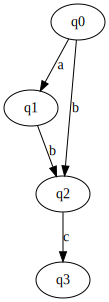

In [3]:

dot = Digraph(format='svg')
dot.node('q0')
dot.node('q1')
dot.node('q2')
dot.node('q3')
dot.edge('q0', 'q1', label='a')
dot.edge('q0', 'q2', label='b')
dot.edge('q1', 'q2', label='b')
dot.edge('q2', 'q3', label='c')

#using IntSlider or PlayButton for animation
w = IntSlider()
display(w)

dot


